**Introduction**
This Notebook is very basic and my first ever competition kernel in Kaggle, here i am analysing  survival status of Titanic ship which took life of more than 1500 people in 2300 people.
It was a sensative data and learned a lot. i took refrence of many experts kernel.

***Note: If this kernel helps you please upvote and your feedback is always appreciable***

**Table of content**
*  Importing important and useful libraries from python.
*  Loading data from dataset using pandas
*  Analysing dataset from both training and test set.
*  Analysing dataset based on featureset.
*  Visualizing dataset based on featureset and correlating.
*  Feature extraction and creation (generation)
*  Imputting missing values in featureset.
*  Dropping unused features from data.
*  Fitting data into various classifier and checking accuracy and score.
*  Checking important feature set.
*  Checking model score on cross validation score.

In very first step first we will import all the library and data from csv file. data can be loaded from various source like cloud or local. it could be in any format like csv, xls or txt. 
plain data might be diffcult to handle therefore we are using pandas dataframe which is very easy to operate and understand. we are using some of important library like numpy for maths operation , seaborn & matplotlib for visualization and sklearn is a scientific library which provides all kinds of classifier, preprocessor etc. we will discuss more about it later in code.

In [4]:
#importing all useful library
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #for visualizing
import seaborn as sns #powerful library for advance visualization.

from sklearn import preprocessing #for encoding categorical variable
from sklearn.linear_model import LogisticRegression #logistic classifier
from sklearn.svm import SVC #SVC classifier
from sklearn.ensemble import RandomForestClassifier #random forest classifier
from sklearn.neighbors import KNeighborsClassifier # k-nearst neighbour
from sklearn.naive_bayes import GaussianNB #GaussianNB classifier
from sklearn.tree import DecisionTreeClassifier #DecisionTree classifier

from sklearn.model_selection import train_test_split #for splitting data into training and testing.
from sklearn.metrics import f1_score #for checking f1-score of model
from sklearn.metrics import confusion_matrix #confusion matrix for checking accuracy

# Input data files are available in the "../input/" directory.
train_dataset = pd.read_csv('train.csv')  # training data
test_dataset = pd.read_csv('test.csv') #test data

After successfully importing all library and dataset in dataframe , lets quickly check whether we have created properly dataframe or not. it is always good to crosscheck once. **head()** method is used for getting initial few records because instead of getting all record which could be in thousands or millions.

In [5]:
#getting initial few record of test dataset
test_dataset.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [6]:
#getting initial few record of training dataset
train_dataset.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

Once we confirmed with dataset in both training and test dataset. now we are moving forword to check what kind of data available and what are columns which will give a deeper understanding of data and lead to help in building a model.

In [7]:
#printing training and test columns which represt feature set.
print("train_dataset.columns ==>",train_dataset.columns)
print("test_dataset.columns ==>",test_dataset.columns)

train_dataset.columns ==> Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
test_dataset.columns ==> Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


Here we are describing dataset which will give count,mean, max, min std and etc things based on each feature which will figure out statistic on current data , for ex: Survived rate is 0.383838 which is around **38%** and max fare is **512**

In [8]:
# describe perform basic mathematical calculation over numerical data
train_dataset.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [9]:
test_dataset.describe()

PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200

Now, only **describe()** will give you understanding on numerical featureset but in real world problem there could be categorical variable as well. so to opt that we need to use  **describe(include=['O'])** . which will give statistic over categorical variable.

In [10]:
# using include['O'] option will give categorical statistic.
train_dataset.describe(include=['O'])

Name   Sex  Ticket        Cabin Embarked
count                        891   891     891          204      889
unique                       891     2     681          147        3
top     Taylor, Mr. Elmer Zebley  male  347082  C23 C25 C27        S
freq                           1   577       7            4      644

In [11]:
test_dataset.describe(include=['O'])

Name   Sex    Ticket            Cabin Embarked
count                          418   418       418               91      418
unique                         418     2       363               76        3
top     Botsford, Mr. William Hull  male  PC 17608  B57 B59 B63 B66        S
freq                             1   266         5                3      270

**Info()** is one of the powerful method which will give you information about if any **missing values** and data type of each values. we will handle missing values in later in kernel. and as all algorithm support only numerical values we need to convert categorical variable into numerical data.
Below you can see **Age**, **Cabin** and **Embarked** in training dataset is having missing values , missing values in **Cabin** is very huge so it does not hold good to put any mean or random values thats why we will drop it without process it.
same explanation hold good for test data as well.


In [12]:
# info of training and test data set.
train_dataset.info()
print("-"*40)
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

Upto this step, you must have got basic understanding of data, how data looks like, what are columns, how many missing values and what are unique, max ,min and so on .... after this we will visualize feature using **seaborn** which will give more clear understanding over data set. 

        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363


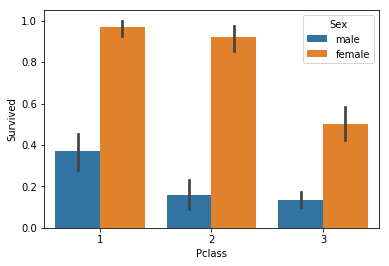

In [13]:
# average of survived on Pclass which is [1,2,3]
print(train_dataset[['Pclass', 'Survived']].groupby('Pclass').mean())
sns.barplot(x='Pclass',y='Survived',hue='Sex',data=train_dataset)

In above graph you can clearly see compare to male female survival is more irrespective of Pclass. similarly below graph showcase survival based on sex

        Survived
Sex             
female  0.742038
male    0.188908


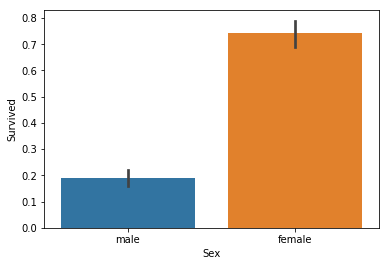

In [14]:
# survival based on sex
print(train_dataset[['Sex', 'Survived']].groupby('Sex').mean())
sns.barplot(x='Sex',y='Survived',data=train_dataset)

In above graph shows prefrences given to female rather than male in ship. so more number of female survived compared to men. below we checking survival based on sibing like wife, husband, parents, mother etc.

       Survived
SibSp          
1      0.535885
2      0.464286
0      0.345395
3      0.250000
4      0.166667
5      0.000000
8      0.000000


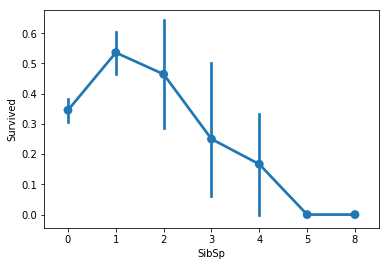

In [15]:
print(train_dataset[['SibSp', 'Survived']].groupby('SibSp').mean().sort_values(by='Survived',ascending=False))
sns.pointplot(x='SibSp',y='Survived',data=train_dataset)

Above point plot shows if person has 0,1 or 2 sibling , he/she has a more survival rate compared to bigger sibling number , it might be because 1 or 2 easily connected and get through but longer family wait for each other and died together (*its just a thinking*)
Below we will check survival based on Embarked.

          Survived
Embarked          
C         0.553571
Q         0.389610
S         0.336957


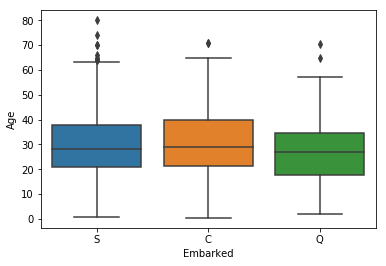

In [16]:
# based on Embarked survival rate
print(train_dataset[['Embarked', 'Survived']].groupby('Embarked').mean())
sns.boxplot(x='Embarked',y='Age',data=train_dataset)

In [17]:
print(train_dataset[["Parch", "Survived"]].groupby('Parch').mean().sort_values(by='Survived',ascending=False))

       Survived
Parch          
3      0.600000
1      0.550847
2      0.500000
0      0.343658
5      0.200000
4      0.000000
6      0.000000


You just wondering after seeing all this graphs how well data correlates, now it looks more easier to get analysis rather than just applying algorithm on raw data. Age was one of the important factor in survival lets check

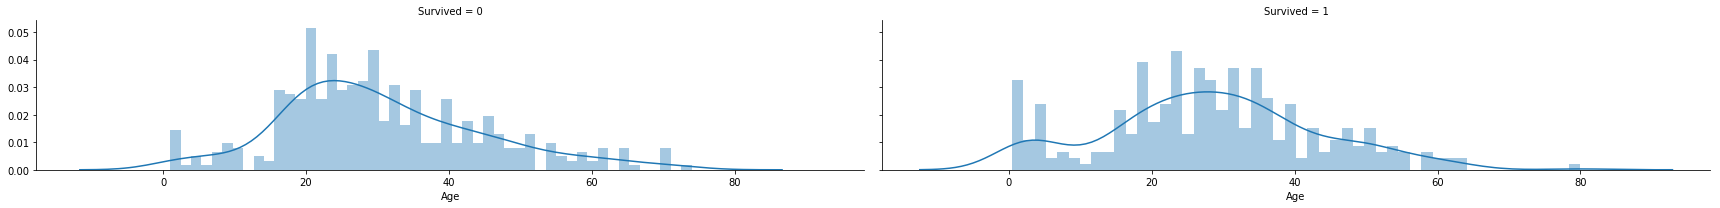

In [18]:
g = sns.FacetGrid(train_dataset,col='Survived',aspect=4)
g.map(sns.distplot,'Age',bins=50)

This age histogram clears that old age people and childern have given much prefrences rather than young age person. its was a doomed day when lots of youngster lost their life.

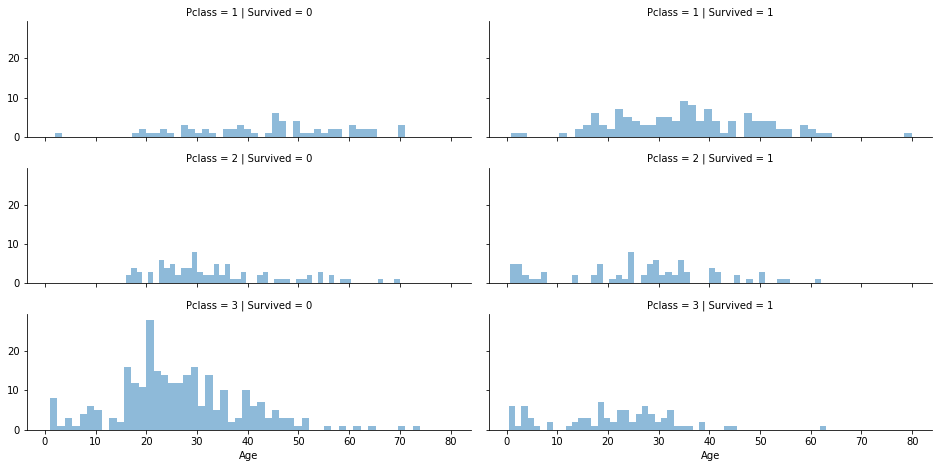

In [19]:
g = sns.FacetGrid(train_dataset,col='Survived',row='Pclass', height=2.2, aspect=3)
g.map(plt.hist,'Age',alpha=.5,bins=50)

The above graph give glimpse of people who survived in pclass based on age. wow how well it is visualize by **seaborn** . that is power of seaborn. Below we are checking based on sex and fare and Embarked.

/usr/local/lib/python3.5/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


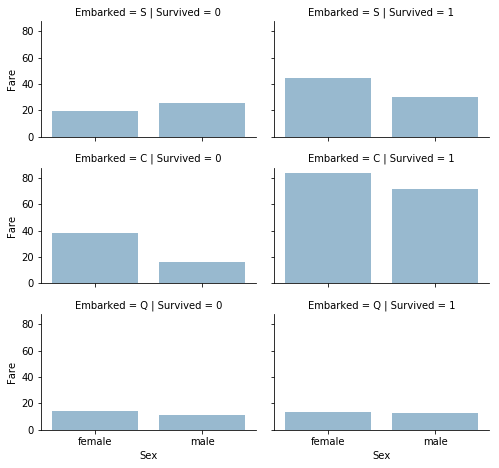

In [20]:
grid = sns.FacetGrid(data=train_dataset, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)

Some must say Enough of graphs lets play with data which technically called as **Data Wrangling**.  as Ticket column has not any relation with survival and has missing value so we are dropping ticket column.
Note: we could have combined training and testing data and then perform all operations  but for easy understanding of training and test data we are maintaing seperately.

In [21]:
#dropping ticket as it has a more missing values.
train_dataset.drop('Ticket',axis=1,inplace=True)
test_dataset.drop('Ticket', axis=1,inplace=True)

In [22]:
#after dropping ticket column checking dataset
train_dataset.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch     Fare Cabin Embarked  
0      0   7.2500   NaN        S  
1      0  71.2833   C85        C  
2      0   7.9250   NaN        S  
3      0  53.1000  C123        S  
4      0   8.0500   NaN        S

In [23]:
train_dataset['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

As we have seen in previous visualization **Title** played a role in survival. if person is **miss/mrs** has more survivability rather than **mr**. so to get a title we have to generate title from name. this is called as **feature generation**.

In [24]:
#extracting Title from each name and storing in new Title column in dataset.
train_dataset['Title'] = train_dataset.Name.str.extract('([A-Za-z]+)\.')
# replacing less frequently columns as Rare.
train_dataset['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],'Rare',inplace=True)

test_dataset['Title'] = test_dataset.Name.str.extract('([A-Za-z]+)\.')
test_dataset['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],'Rare',inplace=True)

#grouping by title and summing survives
train_dataset.groupby('Title').sum()['Survived']

Title
Master     23
Miss      127
Mlle        2
Mme         1
Mr         81
Mrs        99
Ms          1
Rare        8
Name: Survived, dtype: int64

In above we can see Title with more frequent are have more number of people but as less frequent we are replacing to Rare as it will just add extra category in feature so we thought to just put in Rare category as it will not affect much our Survival status.

In [25]:
#replacing Mlle,Mme and Ms to Miss as they all are female only.
train_dataset['Title'] = train_dataset['Title'].replace('Mlle','Miss')
train_dataset['Title'] = train_dataset['Title'].replace('Mme','Miss')
train_dataset['Title'] = train_dataset['Title'].replace('Ms','Miss')

test_dataset['Title'] = test_dataset['Title'].replace('Mlle','Miss')
test_dataset['Title'] = test_dataset['Title'].replace('Mme','Miss')
test_dataset['Title'] = test_dataset['Title'].replace('Ms','Miss')

train_dataset.groupby('Title').sum()['Survived']

Title
Master     23
Miss      131
Mr         81
Mrs        99
Rare        8
Name: Survived, dtype: int64

In [26]:
#checking unique value of embarked 
train_dataset['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [27]:
#check null value if any present in embarked feature.
train_dataset[train_dataset['Embarked'].isnull()]

PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Fare Cabin Embarked Title  
61   female  38.0      0      0  80.0   B28      NaN  Miss  
829  female  62.0      0      0  80.0   B28      NaN   Mrs

In above we can see there is 2 values missing for embarked feature. one can directly fill values which is very frequently , it is normal way of filling missing values but we will figure what value actually need to be fitted out.
if we carefully notice we get a hint in data only, both missing value have **female** candidature, **fare** is 80, and both have **survived**. both belong to **pclass 1**. keeping all this parameter in mind start searching.

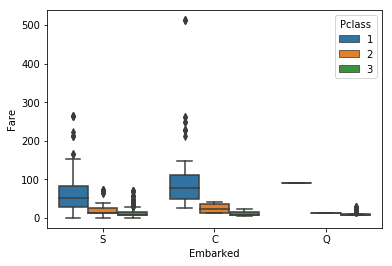

In [28]:
#based on embarked fare on each Pclass, which we will see for our fare 80
sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=train_dataset)

You can see **C** class have mean fare around 80 which is same as our fare. so we get 1 point which prioritize C but we should not leave now. we have to check and confirm.

In [29]:
#checking avg fare of pclass = 1 and survived which is equivalent to our data
train_dataset[(train_dataset['Pclass'] == 1) & (train_dataset['Survived']==1)].mean()['Fare']

95.60802867647058

In [30]:
train_dataset.groupby(['Embarked','Pclass']).mean()

PassengerId  Survived        Age     SibSp     Parch  \
Embarked Pclass                                                         
C        1        440.800000  0.694118  38.027027  0.376471  0.317647   
         2        444.352941  0.529412  22.766667  0.588235  0.529412   
         3        451.484848  0.378788  20.741951  0.348485  0.378788   
Q        1        329.500000  0.500000  38.500000  1.500000  0.000000   
         2        418.000000  0.666667  43.500000  0.000000  0.000000   
         3        420.347222  0.375000  25.937500  0.416667  0.180556   
S        1        477.842520  0.582677  38.152037  0.433071  0.393701   
         2        446.634146  0.463415  30.386731  0.390244  0.371951   
         3        440.685552  0.189802  25.696552  0.705382  0.439093   

                       Fare  
Embarked Pclass              
C        1       104.718529  
         2        25.358335  
         3        11.214083  
Q        1        90.000000  
         2        12.350000  
         3        11.183393  
S        1        70.364862  
         2        20.327439  
         3        14.644083

These both tell that it is **C** class who opt for null values rather **S** class. so a small analysis will lead you to correct dataset.

In [31]:
# filling C in missing columns of Embarked feature.
train_dataset['Embarked'] = train_dataset['Embarked'].fillna('C')
train_dataset['Embarked'].isnull().sum()
#test_dataset['Embarked'].isnull().sum() 0 for test as well

0

Ahh!!, now we reached more than half of way but still way to go.. we see **Cabin** has large missing dataset. so it is not proper if we fill frequent or mean data values. it is better to remove from our dataset.

In [32]:
train_dataset.drop('Cabin',axis=1,inplace=True)
test_dataset.drop('Cabin',axis=1,inplace=True)

Another important feature is **Age**. we have seen in graph it has played a good role. we first check missing values in age feature. 

In [33]:
#checking age null values
train_dataset['Age'].isnull().sum()

177

We clearly see **177** missing age present which is not a good sign, we need to figure out a way to fill this values. it is important that we need to put correct values but 177 is huge count we need to figure out a way to get into.
Now there are difference technique.
1. one can think lets fill more frequent columns.
2. another one lets fill randomly from range of min and max of age.
3. one another may thinks lets check first mean age of survival and mean age of dead. and then accordinly feel mean survival age for survived people and mean dead age for dead people.
4. some might fill just random in between sum of mean()+ std() and mean()-std(). 

so its upto to you how you think and use missing values. there is no rule for choosing. but more accurate data, more accurate prediction.

In [34]:
# filling age randomly between mean()-std() to mean()+std() of age
rand_age = np.random.randint(train_dataset.Age.mean()-train_dataset.Age.std(),train_dataset.Age.mean()+train_dataset.Age.std())
train_dataset.Age = train_dataset.Age.fillna(rand_age)
rand_test_age = np.random.randint(test_dataset.Age.mean()-test_dataset.Age.std(),test_dataset.Age.mean()+test_dataset.Age.std())
test_dataset.Age = test_dataset.Age.fillna(rand_age)
train_dataset['Age'].isnull().sum()
test_dataset['Age'].isnull().sum()

0

Once done we can see age is now properly filled, but we have challenges. lets discuss about difference between **categorical**, **Nominal** and **Ordinal** ,**Numerical** values
**Categorical** :- These values classify the samples into sets of similar samples. Within categorical features are the values nominal, ordinal, ratio, or interval based.
**Nominal** :- which does not occur in order or range.we cannot sort or give any ordering to such variables.    
**Ordinal** :- An ordinal variable is similar to categorical values, but the difference between them is that we can have relative ordering or sorting between the values. For eg: If we have a feature like Height with values Tall, Medium, Short, then Height is a ordinal variable. Here we can have a relative sort in the variable.    
**Continous** :- A feature is said to be continous if it can take values between any two points or between the minimum or maximum values in the features column. Ex: **Age**

as Age is continous feature we would have of 1000 of age but it is not easy to maintain and prediction based on that so  we need to classify based on **age band**.  we need to seprate age in 4 or 5 any number of part.

In [35]:
# creating age band column by different age column for different range of ages.
train_dataset['Ageband'] = pd.cut(train_dataset['Age'], 5)
train_dataset.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch     Fare Embarked Title           Ageband  
0      0   7.2500        S    Mr  (16.336, 32.252]  
1      0  71.2833        C   Mrs  (32.252, 48.168]  
2      0   7.9250        S  Miss  (16.336, 32.252]  
3      0  53.1000        S   Mrs  (32.252, 48.168]  
4      0   8.0500        S    Mr  (32.252, 48.168]

In [36]:
test_dataset['Ageband'] = pd.cut(test_dataset['Age'], 5)
test_dataset.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch     Fare Embarked Title           Ageband  
0  34.5      0      0   7.8292        Q    Mr  (30.502, 45.668]  
1  47.0      1      0   7.0000        S   Mrs  (45.668, 60.834]  
2  62.0      0      0   9.6875        Q    Mr    (60.834, 76.0]  
3  27.0      0      0   8.6625        S    Mr  (15.336, 30.502]  
4  22.0      1      1  12.2875        S   Mrs  (15.336, 30.502]

In [37]:
#printing age band unique columns
print(train_dataset['Ageband'].value_counts())
print("---"*40)
print(test_dataset['Ageband'].value_counts())

(32.252, 48.168]    365
(16.336, 32.252]    346
(0.34, 16.336]      100
(48.168, 64.084]     69
(64.084, 80.0]       11
Name: Ageband, dtype: int64
------------------------------------------------------------------------------------------------------------------------
(15.336, 30.502]    168
(30.502, 45.668]    166
(45.668, 60.834]     42
(0.0942, 15.336]     32
(60.834, 76.0]       10
Name: Ageband, dtype: int64


Above we can see ages in different band now our next task is to assign a proper value for each band range ex age 0 to 16 belong to 0 and so on. now you can see 1000 of age converted into just 1, 2, 3,4. which is very efficient for machine.

In [38]:
#converting age band into categorical value.
train_dataset.loc[train_dataset['Age']<= 16,'Age']=0
train_dataset.loc[(train_dataset['Age']>16) & (train_dataset['Age']<=32),'Age']=1
train_dataset.loc[(train_dataset['Age']>32) & (train_dataset['Age']<=48),'Age']=2
train_dataset.loc[(train_dataset['Age']>48) & (train_dataset['Age']<=64),'Age']=3
train_dataset.loc[(train_dataset['Age']>64),'Age']=4
train_dataset.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  1.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  2.0      1   
2                             Heikkinen, Miss. Laina  female  1.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  2.0      1   
4                           Allen, Mr. William Henry    male  2.0      0   

   Parch     Fare Embarked Title           Ageband  
0      0   7.2500        S    Mr  (16.336, 32.252]  
1      0  71.2833        C   Mrs  (32.252, 48.168]  
2      0   7.9250        S  Miss  (16.336, 32.252]  
3      0  53.1000        S   Mrs  (32.252, 48.168]  
4      0   8.0500        S    Mr  (32.252, 48.168]

In [39]:
# converting float value of age into integer.
train_dataset.Age = train_dataset.Age.astype(int)

In [40]:
# converting test data as well into age categorical value.

test_dataset.loc[test_dataset['Age']<= 16,'Age']=0
test_dataset.loc[(test_dataset['Age']>16) & (test_dataset['Age']<=32),'Age']=1
test_dataset.loc[(test_dataset['Age']>32) & (test_dataset['Age']<=48),'Age']=2
test_dataset.loc[(test_dataset['Age']>48) & (test_dataset['Age']<=64),'Age']=3
test_dataset.loc[(test_dataset['Age']>64),'Age']=4
test_dataset.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

   Age  SibSp  Parch     Fare Embarked Title           Ageband  
0  2.0      0      0   7.8292        Q    Mr  (30.502, 45.668]  
1  2.0      1      0   7.0000        S   Mrs  (45.668, 60.834]  
2  3.0      0      0   9.6875        Q    Mr    (60.834, 76.0]  
3  1.0      0      0   8.6625        S    Mr  (15.336, 30.502]  
4  1.0      1      1  12.2875        S   Mrs  (15.336, 30.502]

In [41]:
# converting age into integer.
test_dataset.Age = test_dataset.Age.astype(int)

Now focus on **family**. you can see whatever we visualize in graph leading to help in our analysis section. we have many feature set in data , we can reduce and can create single feature by using all those redundent feature. both **SibSp** and **Parch** represent family status so lets combine together and form a **family** column. we will later drop both SibSp and Parch.

In [42]:
#generate family from SibSp and Parch...
train_dataset['Family']= train_dataset['SibSp']+train_dataset['Parch']+1
train_dataset.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male    1      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female    2      1   
2                             Heikkinen, Miss. Laina  female    1      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female    2      1   
4                           Allen, Mr. William Henry    male    2      0   

   Parch     Fare Embarked Title           Ageband  Family  
0      0   7.2500        S    Mr  (16.336, 32.252]       2  
1      0  71.2833        C   Mrs  (32.252, 48.168]       2  
2      0   7.9250        S  Miss  (16.336, 32.252]       1  
3      0  53.1000        S   Mrs  (32.252, 48.168]       2  
4      0   8.0500        S    Mr  (32.252, 48.168]       1

In [43]:
test_dataset['Family']= test_dataset['SibSp']+test_dataset['Parch']+1
test_dataset.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

   Age  SibSp  Parch     Fare Embarked Title           Ageband  Family  
0    2      0      0   7.8292        Q    Mr  (30.502, 45.668]       1  
1    2      1      0   7.0000        S   Mrs  (45.668, 60.834]       2  
2    3      0      0   9.6875        Q    Mr    (60.834, 76.0]       1  
3    1      0      0   8.6625        S    Mr  (15.336, 30.502]       1  
4    1      1      1  12.2875        S   Mrs  (15.336, 30.502]       3

*You know a person desire never ends* similarly a data can't be very good. to more optimize solution we are creating a **IsAlone** column which have 0 or 1 values , represent family or not family. rather than family column as 1, 2, 3 etc which of no use if 1 is also present i.e. family presents.

In [44]:
# creating IsAlone column based on Family columns
train_dataset['IsAlone']=0
train_dataset.loc[train_dataset.Family == 1,'IsAlone']=1
test_dataset['IsAlone']=0
test_dataset.loc[test_dataset.Family == 1,'IsAlone']=1

**Fare** is also a continous value column so same treatment like age we have to do. first create Fare band and then divide fare band based on range and assign 0,1,2... values.

In [45]:
# dividing fare into 4 fare band
train_dataset['Fareband'] = pd.qcut(train_dataset['Fare'],4)
train_dataset.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male    1      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female    2      1   
2                             Heikkinen, Miss. Laina  female    1      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female    2      1   
4                           Allen, Mr. William Henry    male    2      0   
5                                   Moran, Mr. James    male    2      0   
6                            McCarthy, Mr. Timothy J    male    3      0   
7                     Palsson, Master. Gosta Leonard    male    0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female    1      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female    0      1   

   Parch     Fare Embarked   Title           Ageband  Family  IsAlone  \
0      0   7.2500        S      Mr  (16.336, 32.252]       2        0   
1      0  71.2833        C     Mrs  (32.252, 48.168]       2        0   
2      0   7.9250        S    Miss  (16.336, 32.252]       1        1   
3      0  53.1000        S     Mrs  (32.252, 48.168]       2        0   
4      0   8.0500        S      Mr  (32.252, 48.168]       1        1   
5      0   8.4583        Q      Mr  (32.252, 48.168]       1        1   
6      0  51.8625        S      Mr  (48.168, 64.084]       1        1   
7      1  21.0750        S  Master    (0.34, 16.336]       5        0   
8      2  11.1333        S     Mrs  (16.336, 32.252]       3        0   
9      0  30.0708        C     Mrs    (0.34, 16.336]       2        0   

          Fareband  
0   (-0.001, 7.91]  
1  (31.0, 512.329]  
2   (7.91, 14.454]  
3  (31.0, 512.329]  
4   (7.91, 14.454]  
5   (7.91, 14.454]  
6  (31.0, 512.329]  
7   (14.454, 31.0]  
8   (7.91, 14.454]  
9   (14.454, 31.0]

In [46]:
test_dataset['Fareband'] = pd.qcut(test_dataset['Fare'],4)
test_dataset.head(10)

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   
5          897       3                    Svensson, Mr. Johan Cervin    male   
6          898       3                          Connolly, Miss. Kate  female   
7          899       2                  Caldwell, Mr. Albert Francis    male   
8          900       3     Abrahim, Mrs. Joseph (Sophie Halaut Easu)  female   
9          901       3                       Davies, Mr. John Samuel    male   

   Age  SibSp  Parch     Fare Embarked Title           Ageband  Family  \
0    2      0      0   7.8292        Q    Mr  (30.502, 45.668]       1   
1    2      1      0   7.0000        S   Mrs  (45.668, 60.834]       2   
2    3      0      0   9.6875        Q    Mr    (60.834, 76.0]       1   
3    1      0      0   8.6625        S    Mr  (15.336, 30.502]       1   
4    1      1      1  12.2875        S   Mrs  (15.336, 30.502]       3   
5    0      0      0   9.2250        S    Mr  (0.0942, 15.336]       1   
6    1      0      0   7.6292        Q  Miss  (15.336, 30.502]       1   
7    1      1      1  29.0000        S    Mr  (15.336, 30.502]       3   
8    1      0      0   7.2292        C   Mrs  (15.336, 30.502]       1   
9    1      2      0  24.1500        S    Mr  (15.336, 30.502]       3   

   IsAlone         Fareband  
0        1  (-0.001, 7.896]  
1        0  (-0.001, 7.896]  
2        1  (7.896, 14.454]  
3        1  (7.896, 14.454]  
4        0  (7.896, 14.454]  
5        1  (7.896, 14.454]  
6        1  (-0.001, 7.896]  
7        0   (14.454, 31.5]  
8        1  (-0.001, 7.896]  
9        0   (14.454, 31.5]

In [47]:
# unique value of fare band..
print(train_dataset['Fareband'].value_counts())
print("---"*40)
print(test_dataset['Fareband'].value_counts())

(7.91, 14.454]     224
(-0.001, 7.91]     223
(31.0, 512.329]    222
(14.454, 31.0]     222
Name: Fareband, dtype: int64
------------------------------------------------------------------------------------------------------------------------
(-0.001, 7.896]    114
(14.454, 31.5]     105
(31.5, 512.329]    102
(7.896, 14.454]     96
Name: Fareband, dtype: int64


In [48]:
# converting fare band into categorical numerical values
train_dataset.loc[train_dataset['Fare']<=7.91,'Fare']=0
train_dataset.loc[(train_dataset['Fare']>7.91) & (train_dataset['Fare']<=14.454),'Fare']=1
train_dataset.loc[(train_dataset['Fare']>14.454) & (train_dataset['Fare']<=31),'Fare']=2
train_dataset.loc[(train_dataset['Fare']>31),'Fare']=3
train_dataset.Fare = train_dataset.Fare.astype(int)

test_dataset.Fare = test_dataset.Fare.fillna(test_dataset.Fare.mean())
test_dataset.loc[test_dataset['Fare']<=7.91,'Fare']=0
test_dataset.loc[(test_dataset['Fare']>7.91) & (test_dataset['Fare']<=14.454),'Fare']=1
test_dataset.loc[(test_dataset['Fare']>14.454) & (test_dataset['Fare']<=31),'Fare']=2
test_dataset.loc[(test_dataset['Fare']>31),'Fare']=3
test_dataset.Fare = test_dataset.Fare.astype(int)



After Feature correction and feature generation next step is to remove unwanted features from dataset so our data will look proper. here we are removing Name,Sibsp, Parch as we have got Title, and IsAlone. Ageband, Family and Fareband also remove because we have converted our continous value into categorical value.

In [49]:
# dropping unwanted feature
train_dataset.columns
test_dataset.columns
train_dataset.drop(['Name','SibSp','Parch','Ageband','Family','Fareband'],axis=1,inplace=True)
test_dataset.drop(['Name','SibSp','Parch','Ageband','Family','Fareband'],axis=1,inplace=True)

In [50]:
# save passenger id as we need at end for submission
train_pid = train_dataset['PassengerId']
train_dataset.drop('PassengerId',axis=1,inplace=True)
test_pid = test_dataset['PassengerId']
test_dataset.drop('PassengerId',axis=1,inplace=True)

In [51]:
train_dataset.head()

Survived  Pclass     Sex  Age  Fare Embarked Title  IsAlone
0         0       3    male    1     0        S    Mr        0
1         1       1  female    2     3        C   Mrs        0
2         1       3  female    1     1        S  Miss        1
3         1       1  female    2     3        S   Mrs        0
4         0       3    male    2     1        S    Mr        1

Now Dataset look much cleaner and correlative to each other but still we have challenges as i earlier told machine only understand numerical value , it has categorical(text) value as well. we have to convert those textual value into numerical value.
We can do it many ways by using map function ex : assigning  0 for male and 1 for female. or by using sklearn.preprocessing which has **LabelEncoder** which will convert text into categorical value 0,1,2... 

In [52]:
# encoding text value into numerical value..
label_encoder = preprocessing.LabelEncoder()
train_dataset['Title'] = label_encoder.fit_transform(train_dataset['Title'])
train_dataset['Sex'] = label_encoder.fit_transform(train_dataset['Sex'])
train_dataset['Embarked'] = label_encoder.fit_transform(train_dataset['Embarked'])

In [53]:
train_dataset.head()

Survived  Pclass  Sex  Age  Fare  Embarked  Title  IsAlone
0         0       3    1    1     0         2      2        0
1         1       1    0    2     3         0      3        0
2         1       3    0    1     1         2      1        1
3         1       1    0    2     3         2      3        0
4         0       3    1    2     1         2      2        1

In [54]:
label_encoder = preprocessing.LabelEncoder()
test_dataset['Title'] = label_encoder.fit_transform(test_dataset['Title'])
test_dataset['Sex'] = label_encoder.fit_transform(test_dataset['Sex'])
test_dataset['Embarked'] = label_encoder.fit_transform(test_dataset['Embarked'])
test_dataset.head()

Pclass  Sex  Age  Fare  Embarked  Title  IsAlone
0       3    1    2     0         1      2        1
1       3    0    2     0         2      3        0
2       2    1    3     1         1      2        1
3       3    1    1     1         2      2        1
4       3    0    1     1         2      3        0

All categorical varible now converted to numerical variable. it is ready to insert into algorithm (classifier) which will classify data based on all parameter.  
**Important Note** : as all algorithm does not work well with labeled value like 1,2,3 etc. we might need to encode those value into 0, 1 only. that can be done in two ways:
1. pandas getdummies() will convert into various feature class and assign 0 or 1.
2. using sklearn **hotencoder** is another option which will convert. check **dummy trap**.

**Note: this operation is comutationally expensive in larger dataset and messy for more feature so we always use this using PCA** . in next kernel i will include those concept. as per now we are using labeled data only.

In [55]:
# drop survive from data set as it is actual value which we will need for training and comparison.
X = train_dataset.drop('Survived',axis=1)
Y = train_dataset['Survived']
Z = test_dataset # this we will use later... after all for checking prediction and cross validation

our first classifier is **Logistic Regression** which is a linear classifier. it is based on the **sigmoid function**. I urge all of you to check videos of andrew ng in course era machine learning course. a best explain approach.

**Important Note**:  in all classsifier we are first training model  and then predicting value. Now we have challenge of **accuracy**. we can't directly say if we have score of lets say 80% that model is perfect.
Accuracy = TP + FP / TP + FP + TN + FN
as TP = true posiitve, FP= false positive, TN=true negetive, FN= false negetive.
**false negetive does not have much effect in model but FP has create a much effect**** in that point of time **precision** and **recall** comes into picture.
Precision = TP / predicted positive (TP + FP)
Recall = TP / actual positive (TP + FN)

Now as we have precision and recall we would not be able to decide which should be best. so to take both we need to take harmonic mean of both and get result as **F-Score**.

F-score = 2 * (precision * recall)/ (precision +  recall)

So for that we are splitting data set in training and test data set using sklearn.train_test_split


In [56]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33,random_state=0)

as we have divided data into two part training and test data this is also called as Cross-validation technique.
there are several like k-fold etc we will see at down of this kernel.

accuracy score is = 78.86
f-score is = 0.7117117117117117


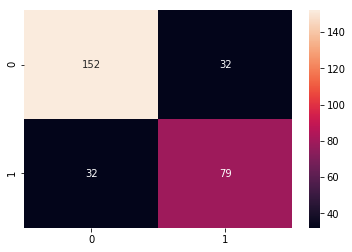

In [57]:
# using Logistic Classifier
log_reg = LogisticRegression()
log_reg.fit(X_train,Y_train)
y_log_pred = log_reg.predict(X_test)
acc_log = round(log_reg.score(X_train, Y_train) * 100, 2)
print("accuracy score is = {0}\nf-score is = {1}".format(acc_log,f1_score(Y_test,y_log_pred)))
Y_test.count()
sns.heatmap(confusion_matrix(Y_test,y_log_pred),annot=True,fmt='2.0f')

You can clearly see difference in accuracy and f-score as in confusin matrix 152 and 79 are correctly postive and negetively predicted but in that place 64 is incorrect prediction.
In below we will see prediction in SVC (support vector) model, here we have to decide 'C' parameter which represnts penalty (regularization) which helps to prevent overfitting but careful larger value of C might underfit your dataset. so optimal value of C must be needed.
To get optimal value of C by regularly iterating and checking we called this step as Hyperparameter tunning.

C  accuracy
3  4     84.23
4  5     84.23
5  6     84.23
6  7     84.23
7  8     84.23
8  9     84.23
1  2     83.72
2  3     83.72
0  1     83.05

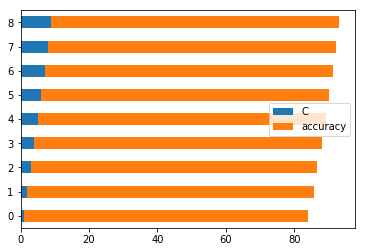

In [58]:
accuracy_score = []
for i in range(1,10):
    svc = SVC(C=i,gamma='auto')
    svc.fit(X_train, Y_train)
    y_svc_pred = svc.predict(X_test)
    acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
    accuracy_score.append([i,acc_svc])
    
acc_df = pd.DataFrame(data=accuracy_score,columns=['C','accuracy'])
acc_df.plot(kind='barh', stacked=True)
acc_df.sort_values(by='accuracy',ascending=False)


accuracy score is = 84.23
f-score is = 0.7534883720930232


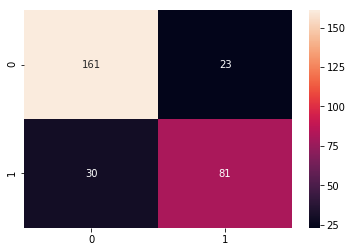

In [59]:
# checking F1 score and confusion matrix for best c value SVC(C=4)
svc = SVC(C=4,gamma='auto')
svc.fit(X_train, Y_train)
y_svc = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
print("accuracy score is = {0}\nf-score is = {1}".format(acc_svc,f1_score(Y_test,y_svc)))
sns.heatmap(confusion_matrix(Y_test,y_svc),annot=True,fmt='2.0f')

Above you can clearly see C =4 and so on is best in accuracy so we will choose lowest best value of C which is 4.
F1-score and confusion matrix is much more reliable than logistic regression.

Now we move on to our Next classifier K-nearest neighbour in which we have to give k (neighbour) parameter value.
so we are choosing value from 3 to 10 and check accuracy.we are not choosing value 1 or 2 because it will be very bias in classifying data.

k  accuracy
0  3     85.07
1  4     84.73
3  6     84.40
4  7     84.40
6  9     83.22
5  8     83.05
2  5     80.20

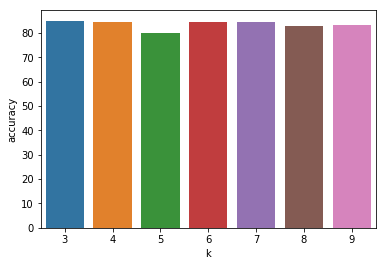

In [60]:
accuracy_kscore = []
for k in range(3,10):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
    accuracy_kscore.append([k,acc_knn])

acc_knndf = pd.DataFrame(data=accuracy_kscore,columns=['k','accuracy'])
sns.barplot(x=acc_knndf['k'],y=acc_knndf['accuracy'],data=acc_knndf)
acc_knndf.sort_values(by='accuracy',ascending=False)


accuracy score is = 85.07
f-score is = 0.7304347826086957


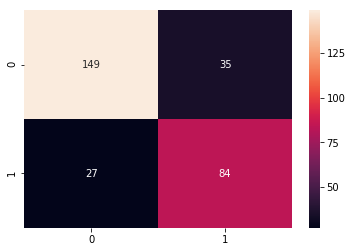

In [61]:
# checking F1 score and confusion matrix for best c value SVC(C=4)
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_knn = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
print("accuracy score is = {0}\nf-score is = {1}".format(acc_knn,f1_score(Y_test,Y_knn)))
sns.heatmap(confusion_matrix(Y_test,Y_knn),annot=True,fmt='2.0f')

Gaussian Naives Bayes is non-linear classifier and uses kernel method. 

In [62]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_gauss = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

77.18

accuracy score is = 77.18
f-score is = 0.71875


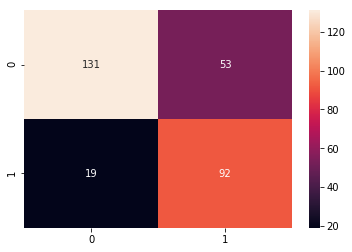

In [63]:
print("accuracy score is = {0}\nf-score is = {1}".format(acc_gaussian,f1_score(Y_test,Y_gauss)))
sns.heatmap(confusion_matrix(Y_test,Y_gauss),annot=True,fmt='2.0f')

Decision tree uses tree methods and form based on hierachial tree concept. you can either use gini index or entropy. it is a very powerful classifier.

In [64]:
decision_tree = DecisionTreeClassifier(max_depth=10)
decision_tree.fit(X_train, Y_train)
Y_decision = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

87.42

accuracy score is = 87.42
f-score is = 0.7647058823529411


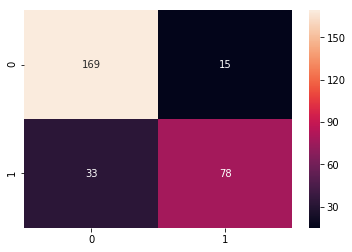

In [65]:
print("accuracy score is = {0}\nf-score is = {1}".format(acc_decision_tree,f1_score(Y_test,Y_decision)))
sns.heatmap(confusion_matrix(Y_test,Y_decision),annot=True,fmt='2.0f')

Random forest is one of the best classifier as it uses powerful tree terminology in ensemble way. it is very useful and widely used across all classifier. you can clearly in all random forest is best one.

In [66]:
random_forest = RandomForestClassifier(n_estimators=400)
random_forest.fit(X_train, Y_train)
Y_random = random_forest.predict(X_test)
# we will use at end of submission
Y_Pred = random_forest.predict(Z)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest
#confusion_matrix(Y_train,Y_pred)

87.42

In [ ]:
print("accuracy score is = {0}\nf-score is = {1}".format(acc_random_forest,f1_score(Y_test,Y_random)))
sns.heatmap(confusion_matrix(Y_test,Y_random),annot=True,fmt='2.0f')

Finally after all we measured all parameters and decided we are going with random forest as it has more suited classifier for this.
Next step is feature importance which is also one of task to understand which feature contributes how much and which are important.

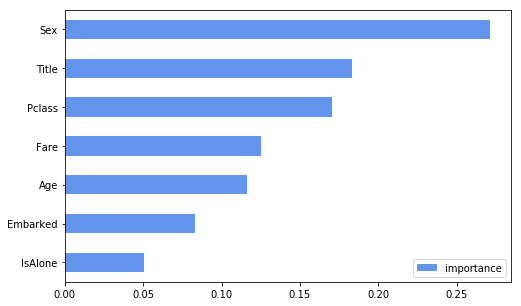

In [67]:
ratios = random_forest.feature_importances_
feature_important = pd.DataFrame(index=X_train.columns, data=ratios, columns=['importance'])
feature_important
feature_important = feature_important.sort_values(by=['importance'], ascending=True)
feature_important.plot(kind='barh', stacked=True, color=['cornflowerblue'], grid=False, figsize=(8, 5))

Many a times, the data is imbalanced, i.e there may be a high number of class1 instances but less number of other class instances. Thus we should train and test our algorithm on each and every instance of the dataset. Then we can take an average of all the noted accuracies over the dataset.

1)The K-Fold Cross Validation works by first dividing the dataset into k-subsets.

2)Let's say we divide the dataset into (k=5) parts. We reserve 1 part for testing and train the algorithm over the 4 parts.

3)We continue the process by changing the testing part in each iteration and training the algorithm over the other parts. The accuracies and errors are then averaged to get a average accuracy of the algorithm.

This is called K-Fold Cross Validation.

4)An algorithm may underfit over a dataset for some training data and sometimes also overfit the data for other training set. Thus with cross-validation, we can achieve a generalised model.

In [68]:
from sklearn.model_selection import KFold   # k-fold 
from sklearn.model_selection import cross_val_score #cross- validation scrore
from sklearn.model_selection import cross_val_predict

kfold = KFold(n_splits=10,random_state=10)

classfy_mean = [];
accuracy_kfold = []
# list of all classifier
classifier = ['Logistic regression','SVC','KNN','Gaussian NB','Decision Tree','Random Forest']

#list of classifier model
models = [LogisticRegression(),SVC(C=4,gamma='auto'),KNeighborsClassifier(n_neighbors=3),GaussianNB(),
          DecisionTreeClassifier(max_depth=10),RandomForestClassifier(n_estimators=100)]

for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y,cv=kfold,scoring='accuracy')
    accuracy_kfold.append(cv_result)
    classfy_mean.append(cv_result.mean())

classfy_mean
#accuracy_kfold
df = pd.DataFrame(data=classfy_mean,index=classifier,columns=['cross-accuracy'])
df.sort_values(by='cross-accuracy',ascending=False)

cross-accuracy
Random Forest              0.808127
SVC                        0.808077
Decision Tree              0.804769
KNN                        0.794694
Logistic regression        0.780050
Gaussian NB                0.748702

Cross-validation accuracy shows random forest is best model and then svc and others we will visualize this using point plot.

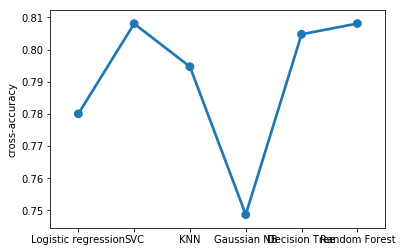

In [69]:
sns.pointplot(x=df.index,y=df['cross-accuracy'])

In [75]:
from sklearn.ensemble import BaggingClassifier
bgc = BaggingClassifier()
bgc.fit(X_train,Y_train)
Y_bgc_Pred = bgc.predict(X_test)
acc_bgc = round(bgc.score(X_train, Y_train) * 100, 2)
acc_bgc

78.36

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


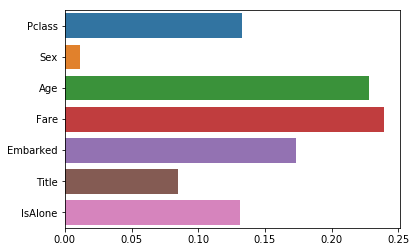

In [108]:
# x_train_fit =X_train[['Pclass', 'Sex', 'Age', 'Fare', 'Title']]
# x_test_fit= X_test[['Pclass','Sex','Age', 'Fare', 'Title']]
#x_test_fit
from xgboost import XGBClassifier
xb = XGBClassifier(learning_rate=0.5,max_depth=100,objective='reg:linear')
xb.fit(X_train,Y_train)
Y_xb_Pred = xb.predict(X_test)
acc_xb = round(xb.score(X_train, Y_train) * 100, 2)
acc_xb
sns.barplot(y=X_test.columns,x=xb.feature_importances_)


In [116]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
xb_grid = XGBClassifier()
parametr= {'learning_rate':[0,0.1,0.5,0.7,1],'max_depth':[10,50,100,200,300],'objective':['reg:linear']}
clf = GridSearchCV(estimator=xb_grid,param_grid=parametr,cv=3)
clf.fit(X_train,Y_train)
clf.best_params_
clf.best_score_

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

<bound method BaseEstimator.get_params of GridSearchCV(cv=3, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'objective': ['reg:linear'], 'learning_rate': [0, 0.1, 0.5, 0.7, 1], 'max_depth': [10, 50, 100, 200, 300]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)>

In [88]:
X_train.columns

Index(['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title', 'IsAlone'], dtype='object')

Finally we came to an end and now last thing we need to submit our model.

In [84]:
# save passenger id as we need at end for submission
submission = pd.DataFrame({
        "PassengerId": test_pid,
        "Survived": Y_Pred
})
submission
# len(test_pid)
# len(Y_Pred)
submission.to_csv("titanic_submission.csv", index=False)